In [1]:
## Importar librerias necesarias
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

In [2]:
grupos_etarios = ["Menores_1","De_1_a_4","De_5_a_14","De_15_a_64","De_65_y_mas"]
grupos_etarios_legend = ["Menores 1","De 1 a 4","De 5 a 14","De 15 a 64","De 65 y más"]

Text(0, 0.5, 'Atenciones (%)')

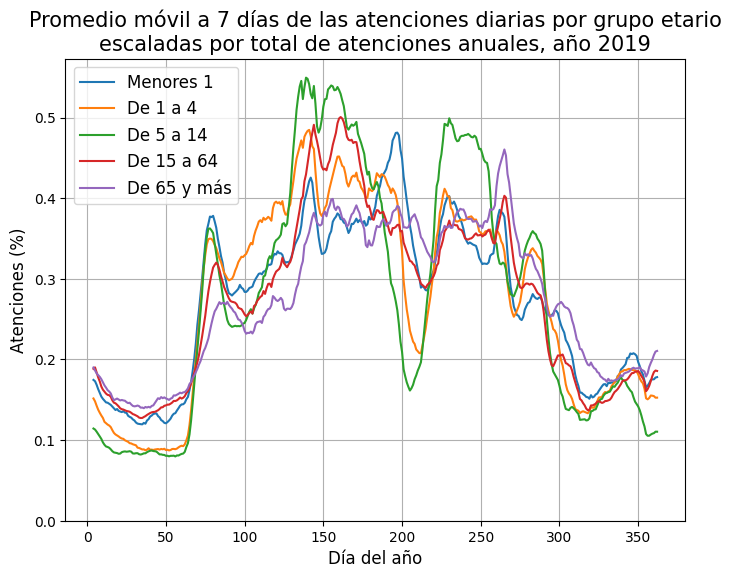

In [3]:
#Comparacion de datos para diferentes grupos etarios para un año fijo
#se usa una media movil a  7 dias de las curvas de atenciones diarias escaladas 
# sobre el total de atenciones anuales
df = duckdb.sql("""
select 
      year(strptime(fecha, '%d/%m/%Y')) as year
    , dayofyear(strptime(fecha, '%d/%m/%Y')) as nrodia
    , sum(Menores_1) as Menores_1
    , sum(De_1_a_4) as De_1_a_4
    , sum(De_5_a_14) as De_5_a_14
    , sum(De_15_a_64) as De_15_a_64
    , sum(De_65_y_mas) as De_65_y_mas
    , sum(Menores_1) + sum(De_1_a_4)+ sum(De_5_a_14) + sum(De_15_a_64) + sum(De_65_y_mas) as atenciones
FROM datos_urgencia_consolidados.parquet
where IdCausa in (3,4,5,6,10,11) 
--and dayofyear(strptime(fecha, '%d/%m/%Y')) <=365
and year(strptime(fecha, '%d/%m/%Y')) in (2019)
group by year, nrodia
order by year, nrodia
""").df()

# ILUSTRACIÓN 2 CURVAS DE DEMANDA PARA DIFERENTES GRUPOS ETARIOS, AÑO FIJO
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 

ax.set_prop_cycle(color = plt.get_cmap("tab10").colors)
for column in grupos_etarios:
    plt.plot(df['nrodia'],100*df[column].rolling(7,center=True).mean()/float(sum(df[column]))) # c = color)

plt.legend(grupos_etarios_legend, loc ="upper left",fontsize  = 12)
ax.set_ylim(ymin=0)
ax.grid()
ax.set_title('Promedio móvil a 7 días de las atenciones diarias por grupo etario\nescaladas por total de atenciones anuales, año 2019', fontsize = 15)
ax.set_xlabel('Día del año', fontsize = 12)
ax.set_ylabel('Atenciones (%)', fontsize = 12)

#plt.savefig('fig2_urgencias_grupo_etario_2019.png', bbox_inches='tight')